In [29]:
# Prep
import seaborn as sbn
import matplotlib.pyplot as plot
import scipy.stats as stats
import numpy as np
import pandas as pd
import math
from scipy.stats import t

In [30]:
# Inspect Data
df = pd.read_excel(r'C:\Users\jonat\Documents\sec_loss_corr.xlsx')
print(df.head())

                Team  Losses  Loser Points Per Game  \
0  Mississippi State       8                   21.1   
1         Vanderbilt       5                   21.9   
2           Arkansas       5                   23.8   
3           Kentucky       7                   14.1   
4           Oklahoma       6                   16.5   

   Loser Total Yards Per Play  Loser Total Yards Per Game  \
0                        5.31                       367.0   
1                        4.96                       290.0   
2                        5.94                       399.8   
3                        4.42                       281.3   
4                        4.20                       278.6   

   Loser Passing Completion Percentage  Loser Pass Yards Per Attempt  \
0                                 55.3                           7.2   
1                                 57.1                           7.0   
2                                 64.4                           8.2   
3             

In [31]:
#Correlation between losses and other categories (Dropped Team bc it holds strings, and dropped Losses bc of redundancy)
df1 = df.drop(columns = ['Team','Losses'])    
corr_matrix = df1.corrwith(df.Losses)
print(corr_matrix)

Loser Points Per Game                     -0.795048
Loser Total Yards Per Play                -0.452280
Loser Total Yards Per Game                -0.515237
Loser Passing Completion Percentage       -0.525142
Loser Pass Yards Per Attempt              -0.477670
Loser Pass Rating                         -0.547603
Loser Pass Attempts Per Game              -0.036578
Loser Pass Yards Per Game                 -0.317881
Loser Average Rush Per Attempt            -0.435958
Loser Rush Attempts Per Game              -0.308958
Loser Rush Yards Per Game                 -0.511478
Loser Average Turnover Margin             -0.741290
Loser Time of Possession Per Game         -0.396040
Loser Red Zone Score Percentage           -0.328313
Loser Chunk Plays                         -0.380457
Yards Per Play Allowed                     0.496393
Yards Per Game Allowed                     0.519092
Points Per Game Allowed                    0.728547
Pass Completion Percentage Allowed         0.728756
Allowed Yard

In [32]:
# Turn series into dataframe
corr_matrix_df = corr_matrix.reset_index()
corr_matrix_df.columns = ['Variable', 'Correlation to Losses']
print(corr_matrix_df)

                                   Variable  Correlation to Losses
0                     Loser Points Per Game              -0.795048
1                Loser Total Yards Per Play              -0.452280
2                Loser Total Yards Per Game              -0.515237
3       Loser Passing Completion Percentage              -0.525142
4              Loser Pass Yards Per Attempt              -0.477670
5                         Loser Pass Rating              -0.547603
6              Loser Pass Attempts Per Game              -0.036578
7                 Loser Pass Yards Per Game              -0.317881
8            Loser Average Rush Per Attempt              -0.435958
9              Loser Rush Attempts Per Game              -0.308958
10                Loser Rush Yards Per Game              -0.511478
11            Loser Average Turnover Margin              -0.741290
12        Loser Time of Possession Per Game              -0.396040
13          Loser Red Zone Score Percentage              -0.32

In [33]:
# Signifigance testing
pvalues = []

for corr in corr_matrix_df['Correlation to Losses']:
    r = corr                                                # correlation coefficients
    n = 14                                                  # teams examined
    tstat = r * math.sqrt((n - 2) / (1 - r ** 2))           # T-stat
    dfree = n - 2                                           # degree of freedom
    p = 2 * (1 - t.cdf(abs(tstat), dfree))                  # P value 
    pvalues.append(p)

corr_matrix_df['P Value'] = pvalues
sorted_cm_df = corr_matrix_df.sort_values(by = 'P Value', ascending = True)
sorted_cm_df = sorted_cm_df.reset_index(drop = True)
print(sorted_cm_df)

                                   Variable  Correlation to Losses   P Value
0            Allowed Yards Per Pass Attempt               0.811676  0.000424
1                     Loser Points Per Game              -0.795048  0.000677
2                        Opponent QB Rating               0.776091  0.001101
3             Loser Average Turnover Margin              -0.741290  0.002413
4        Pass Completion Percentage Allowed               0.728756  0.003111
5                   Points Per Game Allowed               0.728547  0.003124
6       *Opponent Rushing Attempts Per Game               0.597696  0.023985
7                         Loser Pass Rating              -0.547603  0.042662
8       Loser Passing Completion Percentage              -0.525142  0.053819
9                    Yards Per Game Allowed               0.519092  0.057154
10               Loser Total Yards Per Game              -0.515237  0.059356
11                Loser Rush Yards Per Game              -0.511478  0.061560

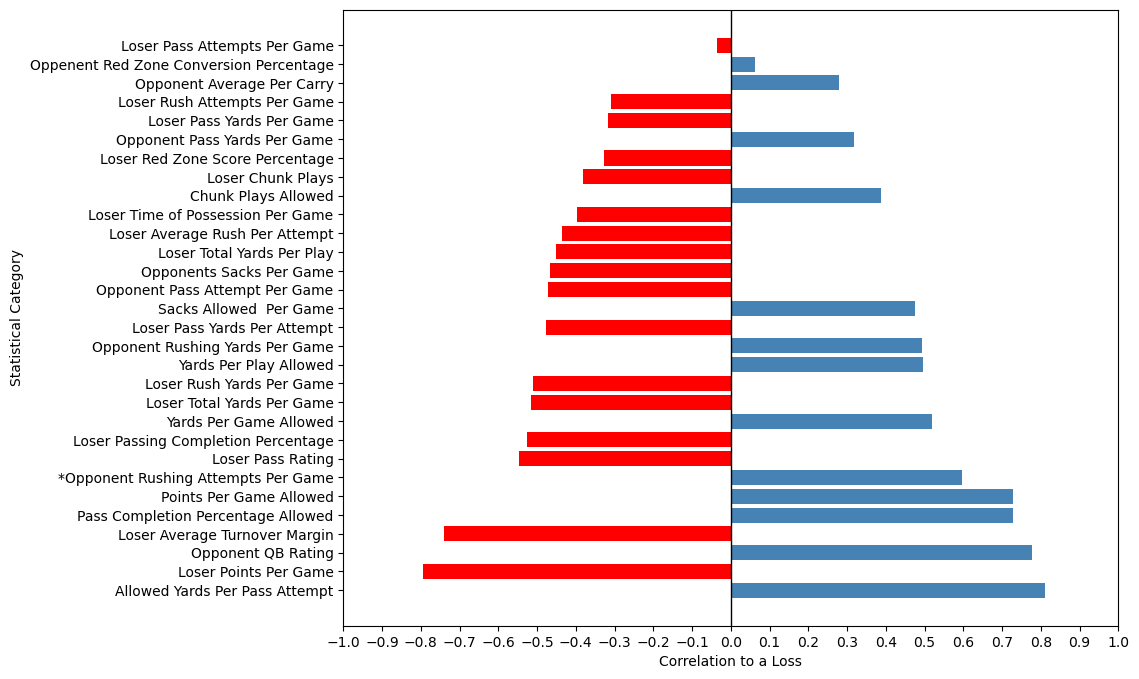

In [34]:
# All categories color-coded
plot.figure(figsize = (10,8))
bars = plot.barh(
    sorted_cm_df['Variable'],
    sorted_cm_df['Correlation to Losses'],
    color=sorted_cm_df['Correlation to Losses'].apply(lambda x: 'red' if x < 0 else 'steelblue')
)

plot.axvline(0, color = 'black', linewidth = 1)
plot.xticks(np.arange(-1.0,1.1,0.1))
plot.tight_layout
plot.xlabel('Correlation to a Loss')
plot.ylabel('Statistical Category')
plot.show()

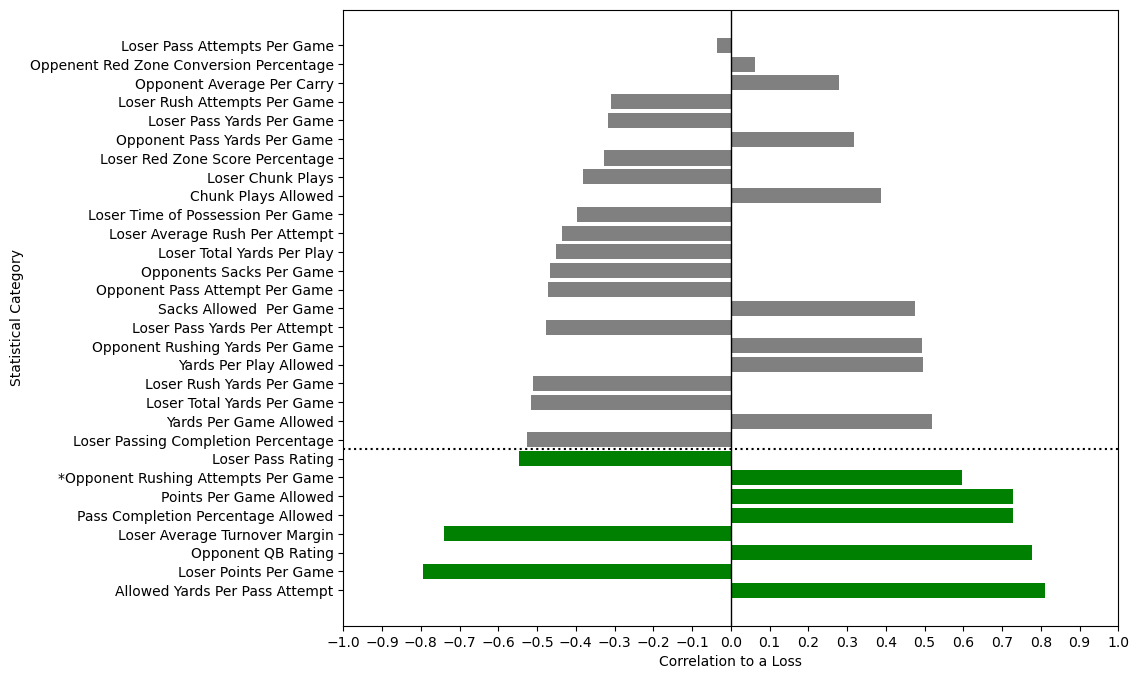

In [35]:
# MAKE THE SIG. BARS COLORFUL, AND NON SIG. GREY
colors = sorted_cm_df['P Value'].apply(lambda p: "grey" if p > 0.05 else "green")
significance_threshold = 0.05 #P Value cutoff for significance (5%)
significant_index = sum(sorted_cm_df['P Value'] < significance_threshold)

plot.figure(figsize = (10,8))
plot.barh(sorted_cm_df['Variable'],sorted_cm_df['Correlation to Losses'], color = colors)
plot.xticks(np.arange(-1.0,1.1,0.1))
plot.tight_layout
plot.xlabel('Correlation to a Loss')
plot.ylabel('Statistical Category')
plot.axvline(0, color = 'black', linewidth = 1)
plot.axhline(y = significant_index - 0.5, color = 'black', linestyle = 'dotted')
plot.show()

In [ ]:
#source ||  https://cfbstats.com/2024/conference/911/index.html